In [54]:
from astropy.io import fits
from scipy.io import readsav
import numpy as np
import matplotlib.pyplot as plt

In [32]:
readsav("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.sav")['lgtaxis']

array([5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. ], dtype='>f4')

In [24]:
readsav("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.sav").keys()

dict_keys(['emcube', 'statuscube', 'lgtaxis', 'ax', 'ay', 'adata', 'wave'])

In [17]:
fits.open("output/full_data/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.2_wpsf.fits")[1].data

FITS_rec([( 2, 5.7), ( 3, 5.8), ( 4, 5.9), ( 5, 6. ), ( 6, 6.1),
          ( 7, 6.2), ( 8, 6.3), ( 9, 6.4), (10, 6.5), (11, 6.6),
          (12, 6.7), (13, 6.8), (14, 6.9), (15, 7. ), (16, 7.1),
          (17, 7.2), (18, 7.3), (19, 7.4), (20, 7.5)],
         dtype=(numpy.record, [('index', '>i2'), ('logt', '>f4')]))

In [28]:
fits.open("output/full_data_fewer_temps/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.01_wpsf.fits")[1].data

FITS_rec([( 2, 5.7), ( 3, 5.8), ( 4, 5.9), ( 5, 6. ), ( 6, 6.1),
          ( 7, 6.2), ( 8, 6.3), ( 9, 6.4), (10, 6.5), (11, 6.6),
          (12, 6.7), (13, 6.8)],
         dtype=(numpy.record, [('index', '>i2'), ('logt', '>f4')]))

In [39]:
lgt = readsav("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.sav")['lgtaxis']
indices = np.arange(2, len(lgt)+2)
col1 = fits.Column(name='index', format="I", array=indices)
col2 = fits.Column(name='logt',  format="E", array=lgt)
hdu = fits.BinTableHDU.from_columns([col1, col2])

In [40]:
hdu.data

FITS_rec([( 2, 5.5), ( 3, 5.6), ( 4, 5.7), ( 5, 5.8), ( 6, 5.9),
          ( 7, 6. ), ( 8, 6.1), ( 9, 6.2), (10, 6.3), (11, 6.4),
          (12, 6.5), (13, 6.6), (14, 6.7), (15, 6.8), (16, 6.9),
          (17, 7. )],
         dtype=(numpy.record, [('index', '<i2'), ('logt', '<f4')]))

In [47]:
a = np.rec.array([( 2, 5.5), ( 3, 5.6), ( 4, 5.7), ( 5, 5.8), ( 6, 5.9),
                  ( 7, 6. ), ( 8, 6.1), ( 9, 6.2), (10, 6.3), (11, 6.4),
                  (12, 6.5), (13, 6.6), (14, 6.7), (15, 6.8), (16, 6.9),
                  (17, 7. )], formats='>i2,>f4', names='index,logt')
fits.append("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.fits", a)

In [49]:
fits.open("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.fits")[1].data

FITS_rec([( 2, 5.5), ( 3, 5.6), ( 4, 5.7), ( 5, 5.8), ( 6, 5.9),
          ( 7, 6. ), ( 8, 6.1), ( 9, 6.2), (10, 6.3), (11, 6.4),
          (12, 6.5), (13, 6.6), (14, 6.7), (15, 6.8), (16, 6.9),
          (17, 7. )],
         dtype=(numpy.record, [('index', '>i2'), ('logt', '>f4')]))

In [53]:
d = fits.open("output/photons/combined_ECCCO_sw_lw_s_i_scaled_spectrally_pure_data_cube_x2_1.0_0.005_wpsf.fits")[0].data

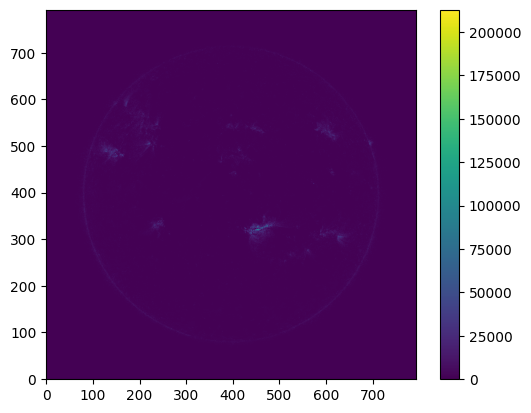

In [59]:
plt.imshow(d[2].data, origin='lower')
plt.colorbar()

In [60]:
hdul = fits.open("data/ECCCO_speedtest_runs/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.005_wpsf.fits")
hdul[0].data = np.mean([hdul[0].data[:, ::2][:, :-2],  
                        hdul[0].data[:, 1::2][:, :-1]], axis=0)
hdul.writeto("data/ECCCO_speedtest_runs/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.005_wpsf.fits", overwrite=True)

In [61]:
fits.open("output/photons/ground_truth_spectrally_pure_data_cube_reshaped.fits")[0].data.shape

(17, 395, 793)